In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math




## Plot of 1st quadrant of circle and rectangle

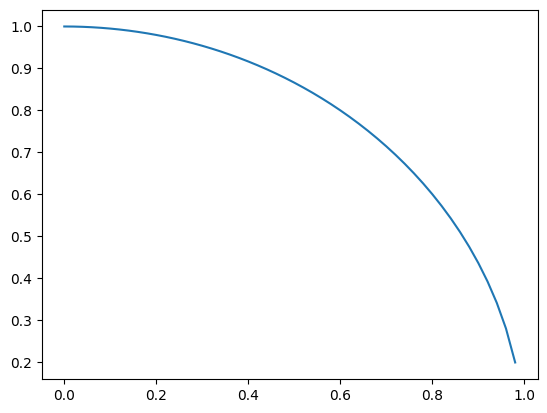

In [2]:
x=np.arange(0,1,0.02)
plt.plot(x,np.sqrt(1-x**2))

## Monte Carlo Hit and Miss

total simulations:100 points_inside_circel79  pi:3.16 error:0.018407346410207026
total simulations:200 points_inside_circel147  pi:2.94 error:0.20159265358979317
total simulations:400 points_inside_circel314  pi:3.14 error:0.0015926535897929917
total simulations:800 points_inside_circel620  pi:3.1 error:0.04159265358979303
total simulations:1600 points_inside_circel1245  pi:3.1125 error:0.029092653589793294
total simulations:3200 points_inside_circel2499  pi:3.12375 error:0.01784265358979331
total simulations:6400 points_inside_circel5022  pi:3.13875 error:0.002842653589793187
total simulations:12800 points_inside_circel10037  pi:3.1365625 error:0.005030153589792974
total simulations:25600 points_inside_circel20128  pi:3.145 error:0.0034073464102069018


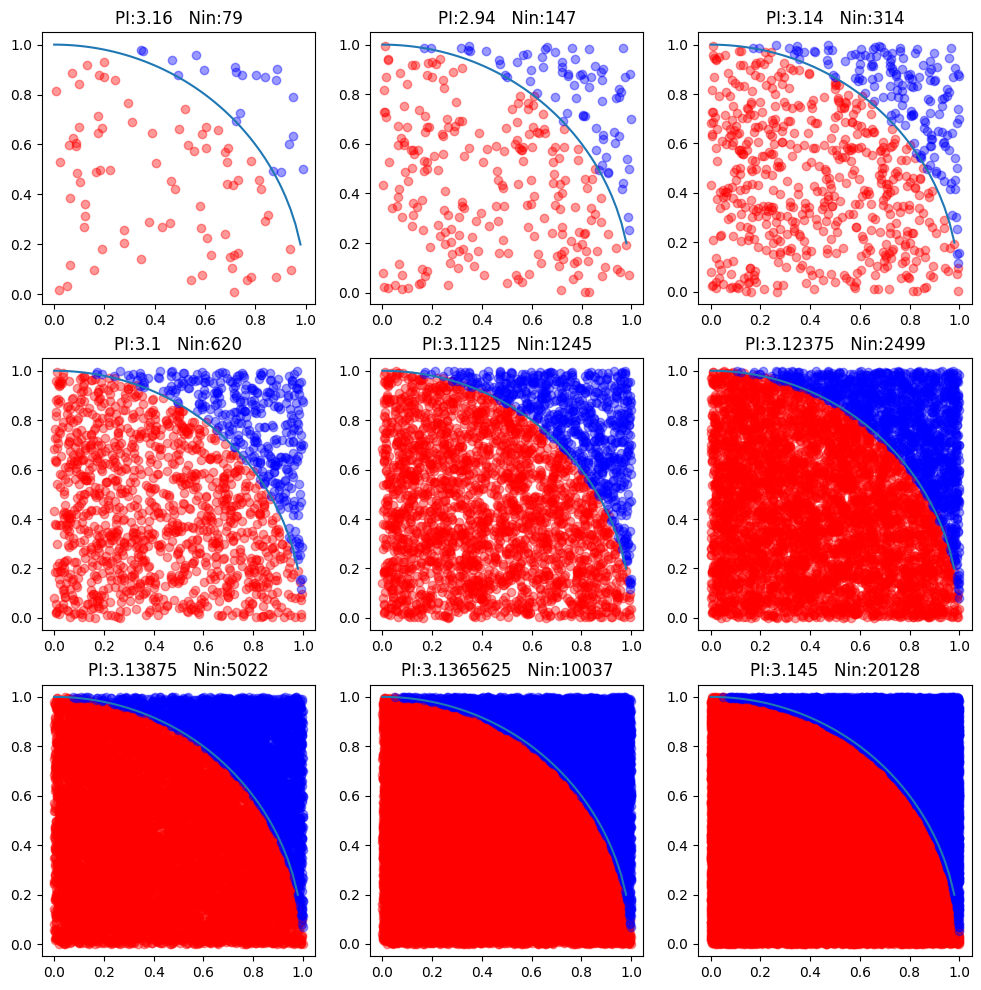

In [25]:
ngroups = 9
N = np.zeros(ngroups)
I = np.zeros(ngroups)
E = np.zeros(ngroups)

xin=[]
yin=[]
x_ex=[]
y_ex=[]
n0 = 100

plt.figure(figsize=(12,12))
for i in range(ngroups):
    N[i] = n0
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0
    Nin = 0
    for j in range(n0):
        if(y[j]<np.sqrt(1-x[j]**2)):
            xin.append(x[j])
            yin.append(y[j])
            Nin += 1
        else:
            x_ex.append(x[j])
            y_ex.append(y[j])
    I[i] = 4*float(Nin)/float(n0)##formula implementation
    E[i] = abs(I[i] - np.pi)

    
    print(f'total simulations:{n0} points_inside_circel{Nin}  pi:{I[i]} error:{E[i]}')
    circle = np.arange(0,1,0.02)
    plt.subplot(3,3,i+1)
    plt.plot(circle, np.sqrt(1-circle**2))
    plt.scatter(xin,yin,c='red',alpha=0.4)
    plt.scatter(x_ex,y_ex,c='blue',alpha=0.4)
    plt.title(f'PI:{I[i]}   Nin:{Nin}')
    
    n0 *= 2



## Error Anlaysis


Text(0, 0.5, 'Error')

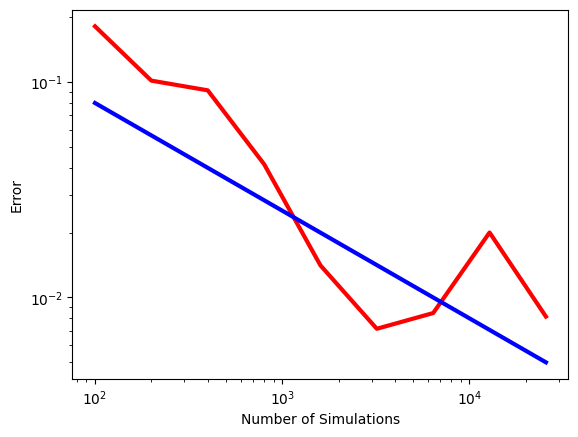

In [4]:
plt.plot(N, E, ls='-', c='red', lw = 3)
plt.plot(N, 0.8/np.sqrt(N), ls='-', c='blue', lw=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Error')

## PI Estimation


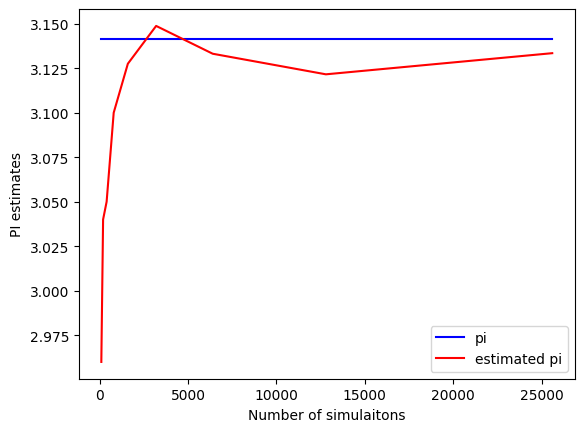

In [5]:
pi = np.full((9, ), math.pi)



plt.plot(N,pi,c='blue',label='pi')
plt.plot(N,I,c='red',label='estimated pi')
plt.xlabel('Number of simulaitons')
plt.ylabel('PI estimates')
plt.legend()

## Now using Monte Carlo Integration

## For  circle


100 3.12064986770794 0.020942785881853165
200 3.1659475928269774 0.024354939237184237
400 3.1698040894992805 0.02821143590948738
800 3.1601954913039334 0.018602837714140286
1600 3.2041961728877473 0.06260351929795416
3200 3.168236122516891 0.026643468927098013
6400 3.1257832354801116 0.015809418109681506
12800 3.138261343477861 0.0033313101119323285
25600 3.1479508439122834 0.006358190322490298


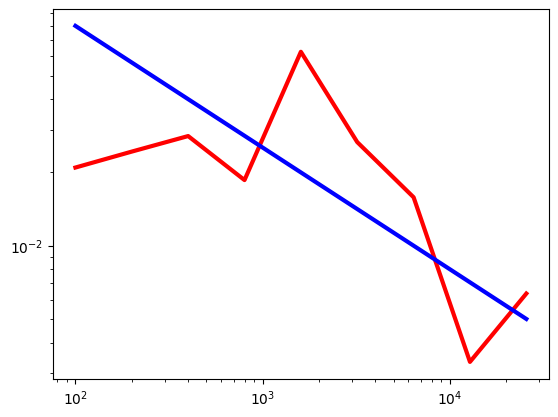

In [27]:
ngroups = 9
N = np.zeros(ngroups)
I = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):
    N[i] = n0
    r = np.random.random(n0)
    I[i] = 0.
    for j in range(n0):
        x = r[j]
        I[i] += np.sqrt(1-x**2)
        
    I[i] *=  4./float(n0)
    E[i] = abs(I[i] - np.pi)
    print(n0, I[i], E[i])
    n0 *= 2

plt.plot(N, E, ls='-', c='red', lw = 3)
plt.plot(N, 0.8/np.sqrt(N), ls='-', c='blue', lw=3)
plt.xscale('log')
plt.yscale('log')


## PI Estimation


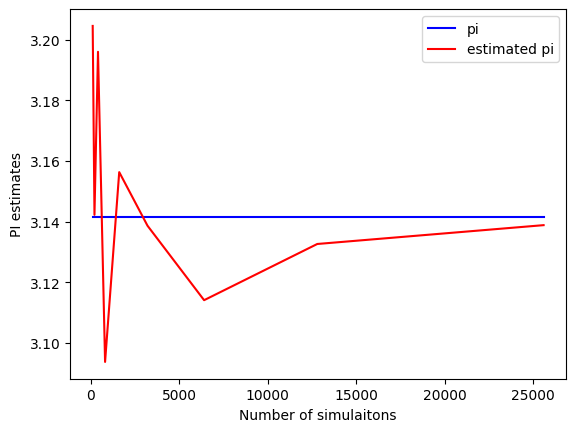

In [7]:

# Create an array of size nine with each element containing the value of pi
pi = np.full((9, ), math.pi)



plt.plot(N,pi,c='blue',label='pi')
plt.plot(N,I,c='red',label='estimated pi')
plt.xlabel('Number of simulaitons')
plt.ylabel('PI estimates')
plt.legend()

## For Any Other Function

In [8]:
def fun(x):
    return x**2 - x  ## replace it with desired function

In [9]:
# Limits of Integration
a = 2   #lower bound
b = 4   #upper bound

## Curve Plotting

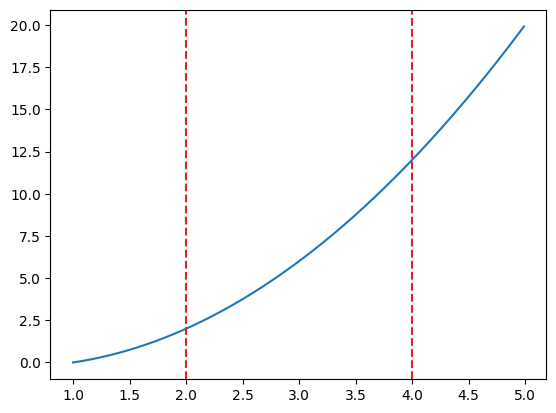

In [10]:
xl = np.arange(1, 5, 0.01)
yl = [x**2 - x for x in xl]
plt.plot(xl, yl)
plt.axvline(a, color="tab:red", linestyle="dashed")
plt.axvline(b, color="tab:red", linestyle="dashed")

## Exact Integration Calculation

In [11]:
def g(x):
    return x**3 / 3 - x**2 / 2     ## replace it with exact intgrqtion of the function


exact_integral = g(b) - g(a)
print("Exact integral is: ", exact_integral)

Exact integral is:  12.666666666666666


## Monte Carlo Integral Calculation


In [12]:
n_samples = 10000
integral = 0.0
for i in range(n_samples):
    rnd = random.uniform(a, b)
    integral += fun(rnd)

integral = (b - a) / float(n_samples) * integral

print("Monte Carlo integral is: {}.".format(integral))

Monte Carlo integral is: 12.68510247950038.


## Calculation of Avg integral and Error

In [13]:
n_experiments = 10000
n_samples = 1000

integral_lst = []


for i in range(n_experiments):
    integral = 0
    for i in range(n_samples):
        rnd = random.uniform(a, b)
        integral += fun(rnd)

    integral = (b - a) / float(n_samples) * integral
    integral_lst.append(integral)

avg_integral=np.mean(integral_lst)
std_integral=np.std(integral_lst)
print("Avg is: {}.".format(avg_integral))
print("std  is: {}.".format(std_integral))


Avg is: 12.666222109694443.
std  is: 0.1846690694762056.


## Exact V/S Monte Carlo Integration

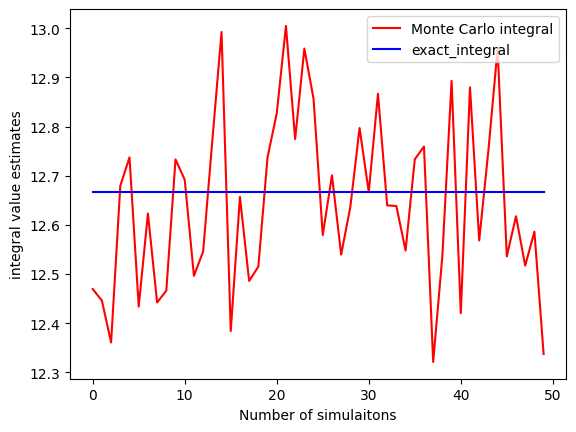

In [15]:
n=np.arange(50,)
exact = np.full((50, ),exact_integral)

plt.plot(n,integral_lst[9950:10000],c='red',label='Monte Carlo integral')
plt.plot(n,exact,c='blue',label='exact_integral')
plt.xlabel('Number of simulaitons')
plt.ylabel('integral value estimates')
plt.legend()

## Normal Distribution of Monte Carlo Integral Values

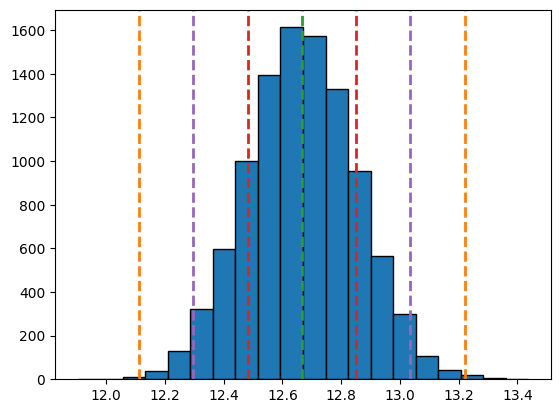

In [16]:
_ = plt.hist(integral_lst, bins=20, edgecolor="black")
plt.axvline(
    avg_integral,
    color="tab:green",
    linestyle="dashed",
    linewidth=2,

)
plt.axvline(
    avg_integral + std_integral,
    color="tab:red",
    linestyle="dashed",
    linewidth=2,

)
plt.axvline(
    avg_integral - std_integral,
    color="tab:red",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    avg_integral +2*std_integral,
    color="tab:purple",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    avg_integral - 2*std_integral,
    color="tab:purple",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    avg_integral + 3*std_integral,
    color="tab:orange",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    avg_integral - 3*std_integral,
    color="tab:orange",
    linestyle="dashed",
    linewidth=2,
)

##                                                      Thank You!!!